In [49]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import logging

In [50]:
driver = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\Sharma\AppData\Local\Temp\ipykernel_6452\1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [51]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [52]:
#If by chance you are encountered with pop up messages of "ACCEPT COOKIES" then according to Selenium documentation
#follow the below code:
#from selenium.webdriver.common.by import By

#driver.find_element(By.XPATH, '//button[text()="Some text"]') #This is a syntax.

In [53]:
# Here we are going to use the method of selenium "find_element_by_class_name" as we saw the page source by inspect element
# so every book was assigned to one class attribute and here we need to find the category bof books first by using the 
# same class here
# afterwards a link.

# Find books 
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link') #'category-page__member-link' is a class name
books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [55]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [59]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [61]:
#character_list #on way to see the list of characters
pd.DataFrame(character_list) #To make the list look more nicer and readable we can convert it into dataframe and execute


,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1269,Category:Time of Contempt characters,Yanna of Murivel
1270,Category:Time of Contempt characters,Yarpen Zigrin
1271,Category:Time of Contempt characters,Yennefer of Vengerberg
1272,Category:Time of Contempt characters,Yiolenta Suarez


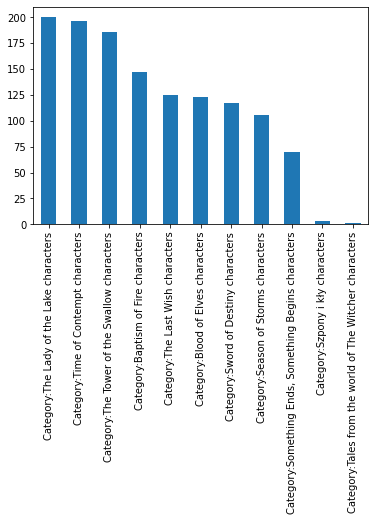

In [38]:
# NUMBER OF CHARACTERS PER BOOK

character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show()